# Étape 1 : Préparation des données

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

## 1)  À partir de la feuille Feuil1, téléchargez le contenu de la base de données et affichez son contenue

In [3]:
data = pd.read_excel("autos-Saporta.xlsx", sheet_name="Feuil1")

In [4]:
data.head()

,Modele,CYL,PUISS,LONG,LARG,POIDS,V.MAX
0,Alfasud TI,1350,79,393,161,870,165
1,Audi 100,1588,85,468,177,1110,160
2,Simca 1300,1294,68,424,168,1050,152
3,Citroen GS Club,1222,59,412,161,930,151
4,Fiat 132,1585,98,439,164,1105,165


## 2) Réalisez une standardisation des données en vue d’une analyse ACP.

In [39]:
data_to_standardized = data[["CYL", "PUISS", "LONG", "LARG", "POIDS", "V.MAX"]]
scaler = StandardScaler()
data_standardized = scaler.fit_transform(data_to_standardized)

## 3) Vérifiez que la moyenne et l’écart type sont nuls.

In [40]:
print("Moyenne des données standardisées")
print(data_standardized.mean())

Moyenne des données standardisées
4.194175870806147e-16


In [41]:
print("Écart-type des données standardisées")
print(data_standardized.std())

Écart-type des données standardisées
1.0


## 4) Déterminez la matrice de corrélation

In [42]:
corr_matrix = np.corrcoef(data_standardized.transpose())
print(corr_matrix)

[[1.         0.79662771 0.70146192 0.62975716 0.78895203 0.66493402]
 [0.79662771 1.         0.64136235 0.52083197 0.765293   0.84437948]
 [0.70146192 0.64136235 1.         0.84926635 0.86809028 0.47592847]
 [0.62975716 0.52083197 0.84926635 1.         0.71687392 0.47294527]
 [0.78895203 0.765293   0.86809028 0.71687392 1.         0.4775956 ]
 [0.66493402 0.84437948 0.47592847 0.47294527 0.4775956  1.        ]]


In [43]:
cov_matrix = np.cov(data_standardized.transpose())
print(cov_matrix)

[[1.05882353 0.84348817 0.74272439 0.6668017  0.83536097 0.70404778]
 [0.84348817 1.05882353 0.67908955 0.55146915 0.81031024 0.89404886]
 [0.74272439 0.67908955 1.05882353 0.8992232  0.91915442 0.50392427]
 [0.6668017  0.55146915 0.8992232  1.05882353 0.75904297 0.50076558]
 [0.83536097 0.81031024 0.91915442 0.75904297 1.05882353 0.50568946]
 [0.70404778 0.89404886 0.50392427 0.50076558 0.50568946 1.05882353]]


## 5) Déterminez les valeurs propres. Que pensez-vous de leur sommes?

In [10]:
eigval, vectors = np.linalg.eig(corr_matrix)
print("Les valeurs propres sont:", "\n", eigval.round(3), "\n")
print("Les vecteurs propres sont:", "\n", vectors.round(3))

Les valeurs propres sont: 
 [4.421 0.856 0.373 0.214 0.093 0.043] 

Les vecteurs propres sont: 
 [[-0.425 -0.124 -0.354  0.808  0.152 -0.059]
 [-0.422 -0.416 -0.185 -0.358 -0.294 -0.633]
 [-0.421  0.412  0.068 -0.28   0.731 -0.19 ]
 [-0.387  0.446  0.605  0.212 -0.478 -0.11 ]
 [-0.431  0.243 -0.484 -0.302 -0.305  0.581]
 [-0.359 -0.62   0.485 -0.074  0.189  0.459]]


# Étape 2 : Analyse ACP

## 1) Réalisez une ACP

In [46]:
acp = PCA(svd_solver="full", n_components=None)
C = acp.fit_transform(data_standardized)

eigenvalues = acp.explained_variance_

## 2) Déterminez les axes factoriels (les facteurs principaux)

In [57]:
print(acp.components_)

[[ 0.42493602  0.42179441  0.42145993  0.38692224  0.43051198  0.35894427]
 [ 0.12419108  0.41577389 -0.41181773 -0.446087   -0.24267581  0.6198626 ]
 [-0.35361252 -0.18492049  0.06763394  0.60486812 -0.48439601  0.48547226]
 [ 0.80778648 -0.35779199 -0.27975231  0.21156941 -0.30171136 -0.0735743 ]
 [ 0.15158003 -0.29373465  0.73056903 -0.47819008 -0.30455842  0.18865511]
 [-0.05889517 -0.63303302 -0.19029153 -0.10956624  0.5808122   0.45852167]]


## 3) Déterminez les coordonnées des individus dans l'espace factoriel

In [67]:
coordonnees_individus = acp.transform(data_standardized)
print(coordonnees_individus)

[[-2.13892361  1.78568102  0.57186228  0.20192734 -0.30135696  0.05392079]
 [ 1.56145859 -1.52704027  1.31527135 -0.21135154  0.14851614 -0.32723844]
 [-1.11938528 -0.67450517  0.4565881  -0.16762584 -0.37536398  0.27180323]
 [-2.5737417   0.11288416  0.1485698  -0.01734322  0.22685322  0.26347623]
 [ 0.4278552   0.69556731 -0.19328567 -0.62775448  0.26350531 -0.03715265]
 [-0.30423764 -0.19614878  0.67580317 -0.55594137 -0.44508594  0.20008299]
 [ 0.6839285  -0.93305677 -0.25682308  0.20313429  0.20865165  0.15389175]
 [-1.94849257 -0.98044805 -0.61957488  0.63031916  0.29316513  0.10864179]
 [ 4.40973457  1.06363317 -0.59352842  0.84724778 -0.37488967  0.04399657]
 [-3.98578242  0.23624042 -0.30313336  0.2651218   0.27842846 -0.32889199]
 [ 0.43765819  1.91244816  0.02494224 -0.75891042  0.16810267 -0.05424075]
 [ 1.01817538 -0.8417121   0.21661021  0.30342642 -0.18487578  0.18489356]
 [ 2.94108031 -0.55917459 -1.24398816 -0.77217107  0.05441213 -0.05726266]
 [ 1.31488038  0.48652246

## Déterminez le nombre d'axe à retenir selon deux approches différentes

In [56]:
num_axes_kaiser = np.sum(eigenvalues > 1)
print(f"Nombre d'axes à retenir selon le critère de Kaiser: {num_axes_kaiser}")

Nombre d'axes à retenir selon le critère de Kaiser: 1


On peut quand même garder la deuxième valeur propre car elle est proche de 1. Donc selon le critère de Kaiser, nous avons 2 axes à retenir.

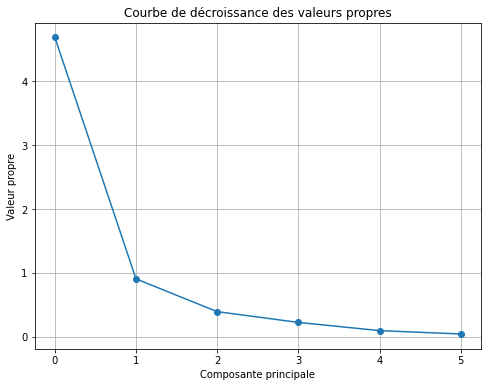

In [66]:
plt.figure(figsize=(8, 6))
plt.plot(eigenvalues, marker='o')
plt.title("Courbe de décroissance des valeurs propres")
plt.xlabel("Composante principale")
plt.ylabel("Valeur propre")
plt.grid(True)
plt.show()


Selon la règle de Coude, en étudiant la courbe de décroissance des valeurs propres on remarque une décroissance lente à la deuxieme valeur propre. Donc selon la règle de Coude, nous avons 2 axes à retenir.

# Étape 3 : Interprétation des résultats de l'ACP

## 1)  Projetez et représentez les individus sur les deux premières composantes principales.

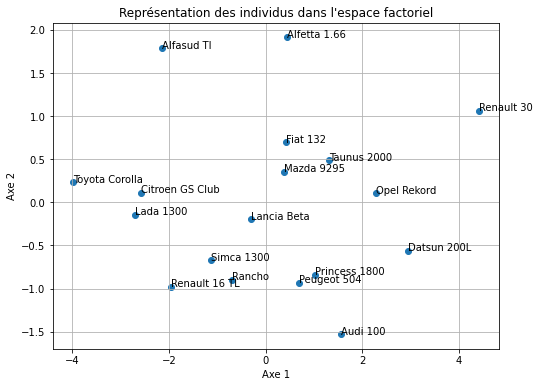

In [55]:
axe_x, axe_y = 0, 1
plt.figure(figsize=(8, 6))
plt.scatter(coordonnees_individus[:, axe_x], coordonnees_individus[:, axe_y], marker='o')
for i, modele in enumerate(data['Modele']):
    plt.text(coordonnees_individus[i, axe_x], coordonnees_individus[i, axe_y], modele)
plt.title("Représentation des individus dans l'espace factoriel")
plt.xlabel(f"Axe {axe_x + 1}")
plt.ylabel(f"Axe {axe_y + 1}")
plt.grid(True)
plt.show()